In [9]:
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.set_printoptions(threshold=sys.maxsize)

In [10]:
### Samples of an Auto Regressive Model
a1, a2, a3 = 0.6, -0.5, -0.2
num = 4000

X = np.zeros(num)
u_train = np.random.uniform(0, 0.1, num)

for t in range(3, num):
    X[t] = a1*X[t-1] + a2*X[t-2] + a3*X[t-3] + u_train[t]

train, test = X[:2000], X[2000:]

In [11]:
class RNN():
    def __init__(self, layers, shape):
        model = keras.Sequential()
        for _ in range(layers):
            layer = keras.layers.SimpleRNN(units=32, return_sequences=True, input_shape=shape)
            model.add(layer)
        model.add(keras.layers.Dense(1))
        self.rnn = model

    def compile(self, optimizer='adam', loss='mean_squared_error'):
        self.rnn.compile(optimizer=optimizer, loss=loss)

    def fit(self, x_train, y_train, epochs=100):
        self.history = self.rnn.fit(x_train, y_train, epochs=epochs)

    def evaluate(self, x_test, y_test):
        y_pred = self.rnn.predict(x_test)[:,-1]
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(mse, mae, r2)
        return mse, mae, r2
    
    def plot(self, title):
        history = self.history.history['loss']
        plt.figure(figsize=(10, 6))
        plt.plot(history, label='Training MSE')
        plt.xlabel('Number of Epochs')
        plt.ylabel('MSE')
        plt.title(title)
        plt.legend()
        plt.show()

In [12]:
def get_data(data, steps):
    X, Y = [], []
    for i in range(len(data)):
        curr = i+steps
        if curr > len(data)-1:
            break
        X.append(data[i:curr])
        Y.append(data[curr])
    return np.array(X), np.array(Y)

shape = (3, 1)
x_train, y_train = get_data(train, 3)
x_test, y_test = get_data(test, 3)

Epoch 1/100
63/63 [==============================] - 2s 5ms/step - loss: 0.0022
Epoch 2/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 3/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 4/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 5/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 6/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 7/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 8/100
63/63 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 9/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 10/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 11/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 12/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 13/100
63/63 [=================

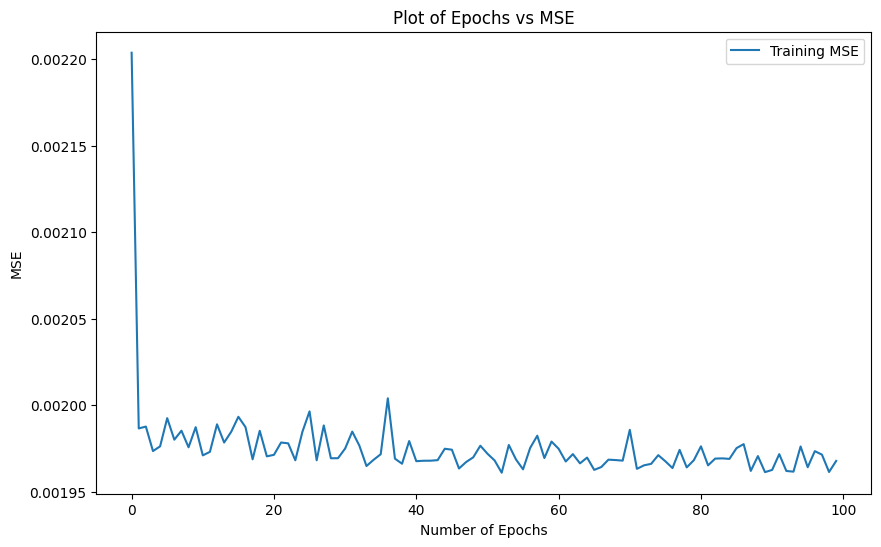

In [13]:
rnn = RNN(1, shape)
rnn.compile()
rnn.fit(x_train, y_train)
rnn.evaluate(x_test, y_test)
rnn.plot('Plot of Epochs vs MSE')

Epoch 1/100
63/63 [==============================] - 4s 8ms/step - loss: 0.0021
Epoch 2/100
63/63 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 3/100
63/63 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 4/100
63/63 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 5/100
63/63 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 6/100
63/63 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 7/100
63/63 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 8/100
63/63 [==============================] - 1s 10ms/step - loss: 0.0020
Epoch 9/100
63/63 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 10/100
63/63 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 11/100
63/63 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 12/100
63/63 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 13/100
63/63 [================

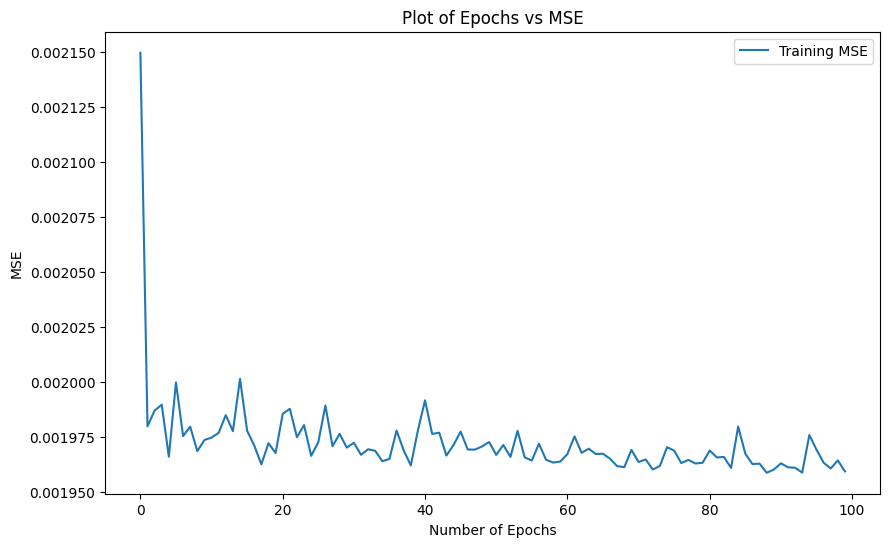

In [14]:
rnn = RNN(2, shape)
rnn.compile()
rnn.fit(x_train, y_train)
rnn.evaluate(x_test, y_test)
rnn.plot('Plot of Epochs vs MSE')

Epoch 1/100
63/63 [==============================] - 5s 8ms/step - loss: 0.0022
Epoch 2/100
63/63 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 3/100
63/63 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 4/100
63/63 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 5/100
63/63 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 6/100
63/63 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 7/100
63/63 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 8/100
63/63 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 9/100
63/63 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 10/100
63/63 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 11/100
63/63 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 12/100
63/63 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 13/100
63/63 [=================

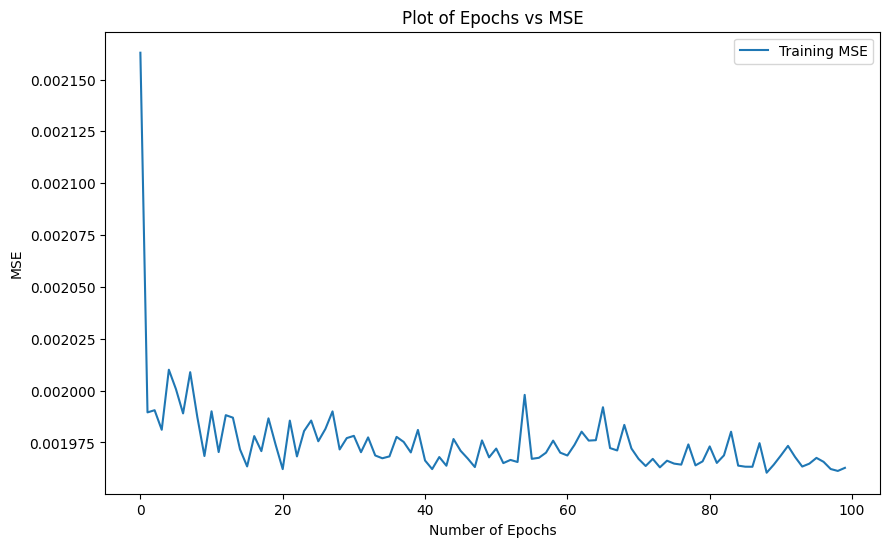

In [15]:
rnn = RNN(3, shape)
rnn.compile()
rnn.fit(x_train, y_train)
rnn.evaluate(x_test, y_test)
rnn.plot('Plot of Epochs vs MSE')